In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
output_dir = 'D:/Thesis/files_output_dir/output_utilization/'
road_data = pd.read_csv(output_dir + 'level3_road_history_holiday_utilization.csv')

In [3]:
road_data.head()

,road_id,length,lanes,max_speed,dir,level,tor,n_connnections,school,ofc,...,volume,qc,vc,Uq,Uv,Uq_norm,Uv_norm,theta_norm,utilization,inv_utilization
0,0,261.877396,2,5.555556,1,3,1.002687,4,0,0,...,4.60,9.7,3.374134,0.474227,1.172227,0.026446,0.250476,0.5,0.201264,4.968598
1,0,261.877396,2,5.555556,1,3,1.002687,4,0,0,...,9.70,9.7,3.374134,1.000000,0.785020,0.060361,0.167739,0.5,0.179331,5.576269
2,0,261.877396,2,5.555556,1,3,1.002687,4,0,0,...,4.60,9.7,3.374134,0.474227,1.549629,0.026446,0.331117,0.5,0.226060,4.423597
3,0,261.877396,2,5.555556,1,3,1.002687,4,0,0,...,2.27,9.7,3.374134,0.234021,1.083404,0.010952,0.231496,0.5,0.193632,5.164445
4,0,261.877396,2,5.555556,1,3,1.002687,4,0,0,...,2.27,9.7,3.374134,0.234021,0.758925,0.010952,0.162163,0.5,0.170571,5.862672


In [ ]:
road_data_selected= road_data[['road_id','time', 'avg_speed',
       'theta', 'volume', 'qc', 'vc', 'Uq', 'Uv', 'Uq_norm', 'Uv_norm',
       'theta_norm', 'utilization']]

# Filter the data for road_id 69753 and time in [48, 72, 108]
# filtered_data = road_data_selected[(road_data_selected['road_id'] == 69753) & (road_data_selected['time'].isin([48, 72, 108]))]
# filtered_data
road_data_selected[road_data_selected['road_id']== 69753]

In [8]:
# Define the time periods for morning, afternoon, and evening
morning_hours = range(8*6, 10*6)    # 8 AM to 10 AM
afternoon_hours = range(14*6, 17*6) # 2 PM to 5 PM
evening_hours = range(18*6, 20*6)   # 6 PM to 08 PM

# Create subsets for each time period
morning_data = road_data[road_data['time'].isin(morning_hours)]
afternoon_data = road_data[road_data['time'].isin(afternoon_hours)]
evening_data = road_data[road_data['time'].isin(evening_hours)]

# Aggregate the data to compute mean values for each period
morning_summary = morning_data[['Uq', 'Uv', 'Uq_norm', 'Uv_norm','theta_norm', 'utilization']].mean()
afternoon_summary = afternoon_data[['Uq', 'Uv', 'Uq_norm', 'Uv_norm','theta_norm','utilization']].mean()
evening_summary = evening_data[['Uq', 'Uv', 'Uq_norm', 'Uv_norm','theta_norm', 'utilization']].mean()

# Create a summary DataFrame to compare the results
summary_df = pd.DataFrame({
    'Period': ['Morning', 'Afternoon', 'Evening'],
    'Avg_Uq': [morning_summary['Uq'], afternoon_summary['Uq'], evening_summary['Uq']],
    'Avg_Uv': [morning_summary['Uv'], afternoon_summary['Uv'], evening_summary['Uv']],
    'Avg_Uq_norm': [morning_summary['Uq_norm'], afternoon_summary['Uq_norm'], evening_summary['Uq_norm']],
    'Avg_Uv_norm': [morning_summary['Uv_norm'], afternoon_summary['Uv_norm'], evening_summary['Uv_norm']],
    'Avg_theta_norm': [morning_summary['theta_norm'], afternoon_summary['theta_norm'], evening_summary['theta_norm']],
    'Avg_Utilization': [morning_summary['utilization'], afternoon_summary['utilization'], evening_summary['utilization']]
})


In [9]:
summary_df

,Period,Avg_Uq,Avg_Uv,Avg_Uq_norm,Avg_Uv_norm,Avg_theta_norm,Avg_Utilization
0,Morning,0.463481,0.968968,0.025753,0.207044,0.357584,0.158797
1,Afternoon,0.544554,0.956253,0.030983,0.204327,0.341023,0.155329
2,Evening,0.610828,0.957635,0.035258,0.204623,0.344639,0.156701


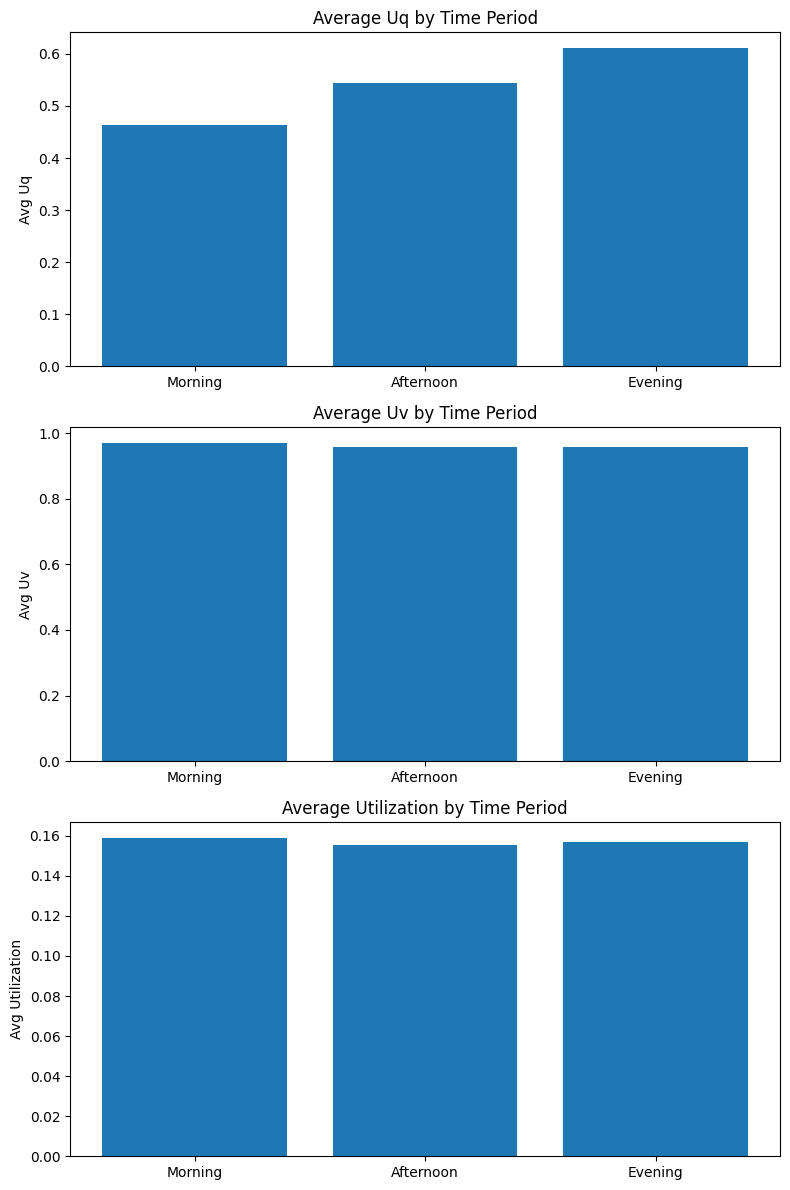

In [10]:


# Set up the figure and axes
fig, ax = plt.subplots(3, 1, figsize=(8, 12))

# Plot Avg_Uq
ax[0].bar(summary_df['Period'], summary_df['Avg_Uq'])
ax[0].set_title('Average Uq by Time Period')
ax[0].set_ylabel('Avg Uq')

# Plot Avg_Uv
ax[1].bar(summary_df['Period'], summary_df['Avg_Uv'])
ax[1].set_title('Average Uv by Time Period')
ax[1].set_ylabel('Avg Uv')

# Plot Avg_Utilization
ax[2].bar(summary_df['Period'], summary_df['Avg_Utilization'])
ax[2].set_title('Average Utilization by Time Period')
ax[2].set_ylabel('Avg Utilization')

# Adjust layout
plt.tight_layout()
plt.show()

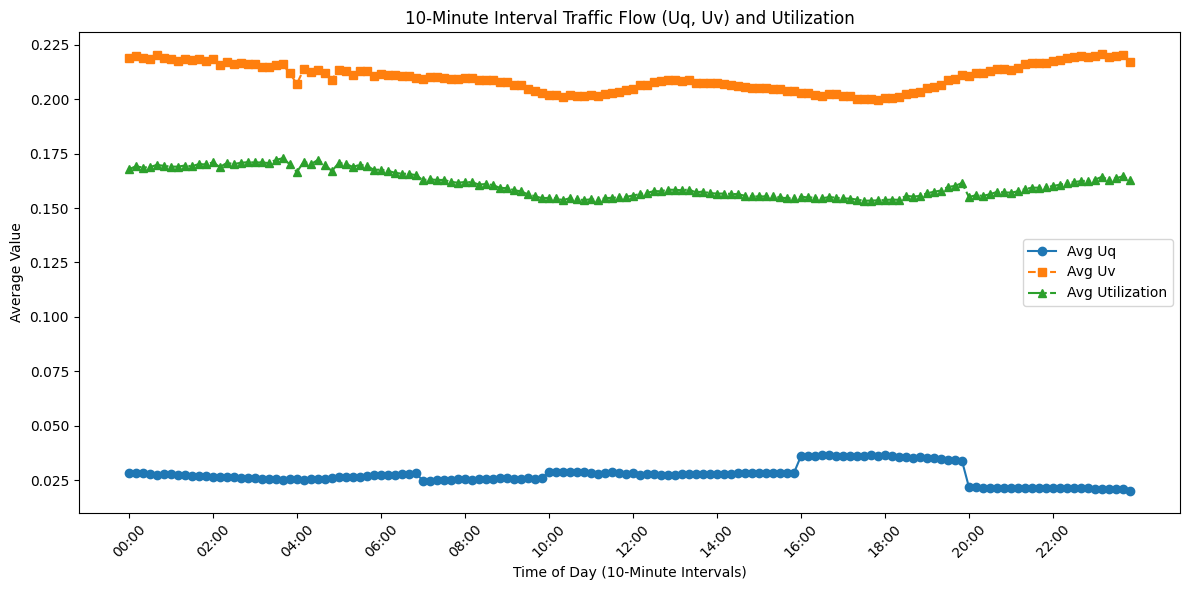

In [11]:
# Grouping the data by time to compute the average Uq, Uv, and utilization for each hour
hourly_summary = road_data.groupby('time')[['Uq_norm', 'Uv_norm', 'utilization']].mean().reset_index()

# Convert 10-minute intervals into readable time format (00:00, 00:10, ..., 23:50)
hour_labels = [(f"{int(t//6):02}:{(t%6)*10:02}") for t in hourly_summary['time']]

# Plotting the hourly Uq, Uv, and utilization with adjusted time labels
plt.figure(figsize=(12, 6))

# Plot Uq with a circle marker
plt.plot(hourly_summary['time'], hourly_summary['Uq_norm'], marker='o', label='Avg Uq', linestyle='-')
# Plot Uv with a square marker
plt.plot(hourly_summary['time'], hourly_summary['Uv_norm'], marker='s', label='Avg Uv', linestyle='--')
# Plot Utilization with a triangle marker
plt.plot(hourly_summary['time'], hourly_summary['utilization'], marker='^', label='Avg Utilization', linestyle='-.')


# Adding labels and title
plt.title('10-Minute Interval Traffic Flow (Uq, Uv) and Utilization')
plt.xlabel('Time of Day (10-Minute Intervals)')
plt.ylabel('Average Value')

# Set custom x-axis labels
plt.xticks(hourly_summary['time'][::12], hour_labels[::12], rotation=45)  # Show every 2-hour label

# Show legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

In [12]:
# Step 1: Calculate the average utilization for each road segment
road_utilization = road_data.groupby('road_id')['utilization'].mean().reset_index()

# Step 2: Set thresholds for high and low utilization (e.g., top 10% and bottom 10%)
high_threshold = road_utilization['utilization'].quantile(0.9)  # Top 10%
low_threshold = road_utilization['utilization'].quantile(0.1)   # Bottom 10%

# Step 3: Identify roads with high and low utilization
high_utilization_roads = road_utilization[road_utilization['utilization'] >= high_threshold]
low_utilization_roads = road_utilization[road_utilization['utilization'] <= low_threshold]

# Display the identified road segments
print("High Utilization Roads:\n", high_utilization_roads)
print("Low Utilization Roads:\n", low_utilization_roads)


High Utilization Roads:
        road_id  utilization
4            9     0.291376
5           10     0.283582
7           15     0.296214
9           18     0.271128
10          19     0.289754
...        ...          ...
51845    81571     0.291226
51846    81572     0.228515
51850    81586     0.228104
51851    81587     0.380771
51852    81588     0.227500

[5185 rows x 2 columns]
Low Utilization Roads:
        road_id  utilization
15          32     0.080779
43          89     0.071992
50          98     0.062705
52         100     0.083889
54         103     0.079742
...        ...          ...
51841    81563     0.066419
51843    81567     0.075573
51847    81575     0.081395
51848    81582     0.064775
51849    81583     0.056517

[5185 rows x 2 columns]


In [13]:
# Sorting the DataFrame by the 'Utilization_Percentage' column in descending order
sorted_df = high_utilization_roads.sort_values(by='utilization', ascending=False)
styled_df = sorted_df.style.set_caption("High Utilization Roads").highlight_max(subset="utilization", color="lightgreen")

styled_df

,road_id,utilization
44282,69659,0.540001
51574,81026,0.452551
37023,56572,0.449970
41995,65458,0.440707
42933,67676,0.425411
40917,63260,0.424426
50691,79859,0.411867
40941,63289,0.411349
37540,57392,0.409822
43577,68622,0.406582


In [14]:

# Sorting the DataFrame by the 'Utilization_Percentage' column in descending order
sorted_df = low_utilization_roads.sort_values(by='utilization', ascending=True)
styled_df = sorted_df.style.set_caption("Low Utilization Roads").highlight_max(subset="utilization", color="lightgreen")

styled_df

,road_id,utilization
44078,69272,0.009826
23493,36820,0.010094
41636,64749,0.012547
44100,69310,0.014185
18388,29079,0.016877
43862,68981,0.018114
41669,64797,0.018381
19830,31403,0.020176
19339,30397,0.020260
44313,69695,0.020461


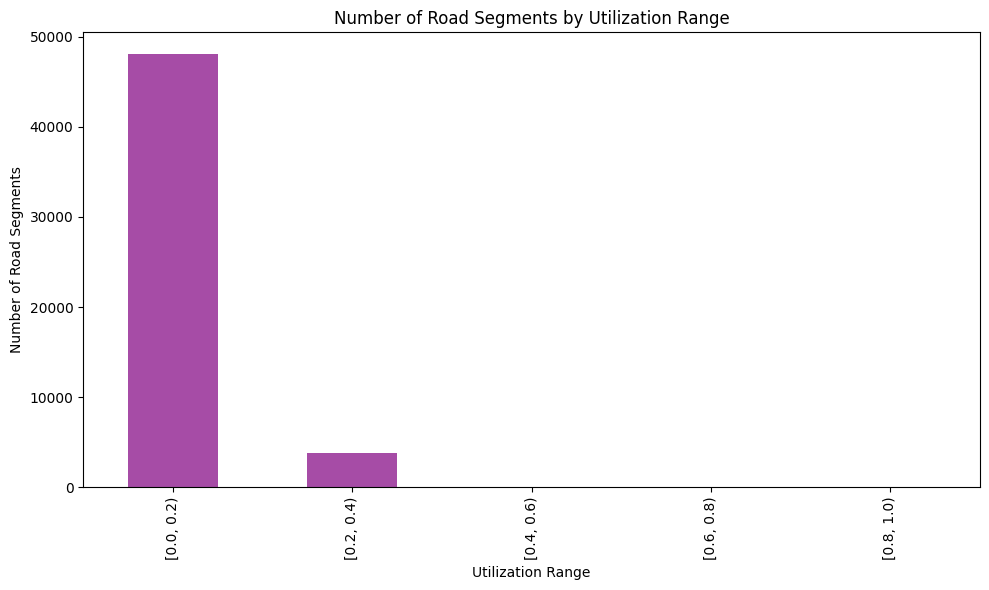

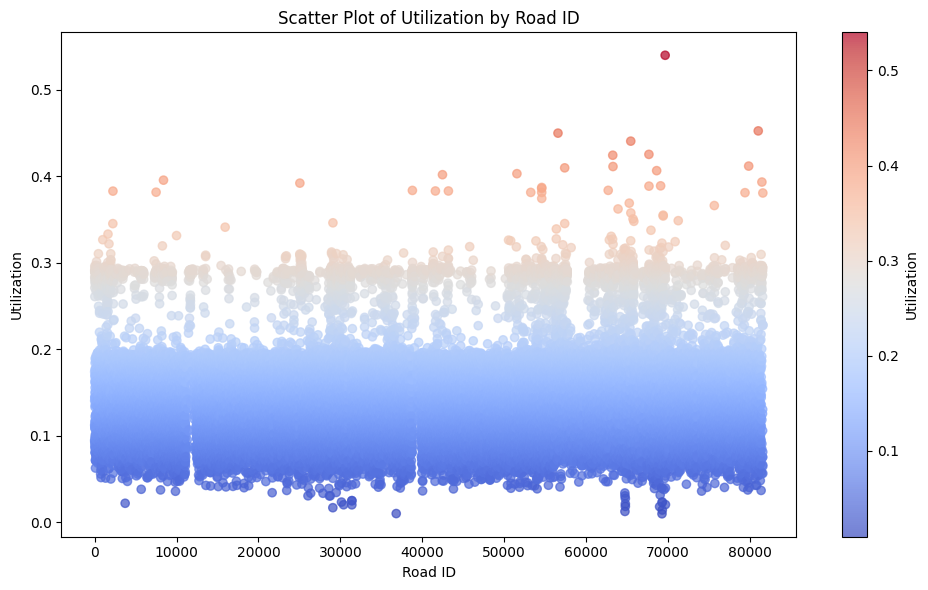

In [15]:
# Preparing data for different visualizations

# Combine high and low utilization data into a single DataFrame
road_utilization['category'] = 'Normal'  # Default category
road_utilization.loc[road_utilization['utilization'] >= high_threshold, 'category'] = 'High Utilization'
road_utilization.loc[road_utilization['utilization'] <= low_threshold, 'category'] = 'Low Utilization'


# 4. Bar Plot by Utilization Range
utilization_bins = pd.cut(road_utilization['utilization'], bins=[0, 0.2, 0.4, 0.6, 0.8, 1.0], right=False)
utilization_counts = utilization_bins.value_counts().sort_index()
plt.figure(figsize=(10, 6))
utilization_counts.plot(kind='bar', color='purple', alpha=0.7)
plt.title('Number of Road Segments by Utilization Range')
plt.xlabel('Utilization Range')
plt.ylabel('Number of Road Segments')
plt.tight_layout()
plt.show()

# 5. Scatter Plot (Utilization vs. Road IDs)
plt.figure(figsize=(10, 6))
plt.scatter(road_utilization['road_id'], road_utilization['utilization'], c=road_utilization['utilization'], cmap='coolwarm', alpha=0.7)
plt.title('Scatter Plot of Utilization by Road ID')
plt.xlabel('Road ID')
plt.ylabel('Utilization')
plt.colorbar(label='Utilization')
plt.tight_layout()
plt.show()
